## MLCSU Lead Data Scientist challenge
### Katherine Ridley, 25/11/22

This ‘Lead Data Scientist’ position at the Health Economics Unit requires a thorough understanding of data science, analytics, machine learning and programming. The successful candidate should have a passion for using analytics to better understand healthcare data and to improve decision making.

As part of the interview process we would like you to analyse a dataset which has information on heart failure. The data contains various other relevant healthcare variables, for example, relating to patient demographics and diseases.

We want you to process the data using any technique(s) of your choosing, for example:

Regression
Classification
Clustering
Forecasting
Causal inference
Statistical analysis
Other machine learning/deep learning techniques
You can use any programming language in the analysis. We then want you to write up the work in no more than two pages.

Please send your code and report by the date mentioned is your test invite to david.sgorbati@nhs.net

This is your opportunity to showcase your skills and to demonstrate that you would be suitable for this role in our team.

We very much look forward to receiving and reviewing your submission, and we wish you the best of luck in this assignment.

Best wishes HEU

In [ ]:
##Import packages


from dataclasses import dataclass
import pandas as pd
import numpy as np
import os
import math
import scipy

import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from docx import Document
from docx2pdf import convert
from docx.shared import Inches
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import shapiro
import scikit_posthocs as sp
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn import tree 
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import cross_validate

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import shap
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import BaggingClassifier as BGC
from sklearn import decomposition, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import joblib
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Spectral6
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter)

from bokeh.transform import transform

from bokeh.plotting import figure, show

from bokeh.palettes import RdYlGn6, RdYlGn9
from bokeh.sampledata.autompg import autompg
from bokeh.sampledata.unemployment1948 import data

from bokeh.sampledata.commits import data
from bokeh.transform import jitter
from bokeh.transform import factor_cmap, factor_mark

In [ ]:
## Import data

## To run thise code, add path to 'Test_data.csv' here:

path = "C:/Users/KatherineRidley/Documents/Challenges/"

df = pd.read_csv(path + "Test_data.csv")


##make directories
experiments = ['datasets','descriptives', 'correlations', 'analysis of variance', 'regression', 'classification']
for experiment in experiments:
    os.makedirs(path+experiment, exist_ok=True)
    


In [ ]:
##Data handling

#print(df.head())


print('Unique values in each column: \n', df.apply(lambda col: col.unique()))
print('\nNumber of null values in each column:\n',df.apply(lambda col: col.isnull().sum()))

print('\nNumber of unique values in each column: \n', df.apply(lambda col: len(col.unique())))


In [ ]:
##identify outliers in linear variables

#for l in linear:
 #   print(l, df[l].describe())
  #  print('\n')

##remove outliers in linear variables

#z score outlier removal for bmi
#df = df[(np.abs(stats.zscore(df['BMI'])) < 3)]


#for l in linear:
   # print(l, df[l].describe())
   # print('\n')

### Categorical key:
#### BMIcategory
Underweight: Less than 18.5.

Optimum range: 18.5 to 24.9.

Overweight: 25 to 29.9.

Class I obesity: 30 to 34.9.

Class II obesity: 35 to 39.9.

Class III obesity: More than 40.

Class IIII obesity: More than 60.

##### Covid:
0 = pre-2020

1 = 2020-

### Dummies key:

Race_simplified: 'White': 1 , Other combined: 2

Race:  'White': 1, 'Black': 2, 'Asian': 3, 'Hispanic':4, 'American Indian/Alaskan Native':5, 'Other': 6

Sex: 'Female': 1, 'Male': 2

GenHealth: 'Excellent': 1, 'Very Good': 2, 'Good': 3, 'Fair':4, 'Poor':5



In [ ]:
class DataCleaner:
    def __init__(self, df):
        self.df = df
        self.categorical = list(df.select_dtypes(include=['object']).columns)
        self.linear = list(df.select_dtypes(include=['int64','float64']).columns)
        self.df_clean = df.copy()
        self.df_clean = self.df_clean.drop(['Unnamed: 0'], axis=1)
    def clean_categorical(self):
        df = self.df_clean
        categorical = self.categorical
        #for c in categorical:
            #print(c, df[c].value_counts())
        df.loc[(df.GenHealth=='goo_d') | (df.GenHealth=='Goo_d'),'GenHealth'] = 'Good'
        df.loc[(df.GenHealth=='ExCellent'),'GenHealth'] = 'Excellent'
        df.loc[df.AgeCategory=='80 or older','AgeCategory'] = '80+'
        df['date'] = pd.to_datetime(df['date'])
        df['date'] = df['date'].dt.strftime('%Y-%m-%d')
        df['year'] = pd.DatetimeIndex(df['date']).year
        df['month'] = pd.DatetimeIndex(df['date']).month
        df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek
        ##age cateogry order
        df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], ordered=True)
        df['GenHealth'] = pd.Categorical(df['GenHealth'], categories=['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], ordered=True)
            
        
        self.categorical.remove('date')
        return df, self.categorical
    def clean_linear(self, df):
        df = self.df_clean
        
        #for l in linear:
            #print(l, df[l].describe())
            #print('\n')
        #df = df[(np.abs(stats.zscore(df['BMI'])) < 3)]
        df['BMIcategory'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 35, 40, 60, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III', 'Obese IIII'])
        df['BMIcategory'] = df['BMIcategory'].astype('category')
        self.categorical.append('BMIcategory')
        self.linear.remove('Unnamed: 0')
        self.linear.remove('Patient_ID')
        
        
        return df, self.categorical, self.linear

    def dummies(self, df_clean):
        yesnovar = ['Dead/Alive', 'SkinCancer', 'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease']

        for v in yesnovar:


            df_clean[v] = df_clean[v].replace({'Yes': 1, 'No': 0})

        df_clean['Sex#'] = df_clean['Sex'].replace({'Female': 1, 'Male': 2})

        df_clean['Race#'] = df_clean['Race'].replace({'White': 1, 'Black': 2, 'Asian': 3, 'Hispanic':4, 'American Indian/Alaskan Native':5, 'Other': 6})

        df_clean['GenHealth#'] = df_clean['GenHealth'].replace({'Excellent': 1, 'Very good': 2, 'Good': 3, 'Fair':4, 'Poor':5})

        df_clean['Diabetic#'] = df_clean['Diabetic'].replace({'Yes': 1, 'No': 0, 'Yes (during pregnancy)': 1, 'No, borderline diabetes': 0})

        df_clean['Age_Group'] = df_clean['AgeCategory'].str[:2].astype(int)

        df_clean['Race_simplified'] = df_clean['Race#'].replace({3:2, 4:2, 5:2, 6:2})

        df_clean.loc[df_clean['year']<2020, 'Covid'] = 0
        df_clean.loc[df_clean['year']>=2020, 'Covid'] = 1




        

        df_clean_dummies = df_clean.drop(['Race', 'Sex', 'GenHealth', 'AgeCategory', 'Diabetic', 'date', 'BMIcategory', 'Patient_ID'], axis=1)
        
        return df_clean_dummies

In [ ]:
##run data cleaner

dc = DataCleaner(df)
df_clean, categorical = dc.clean_categorical()

df_clean, categorical, linear = dc.clean_linear(df_clean)

datetime = ['year', 'month', 'dayofweek']

df_clean_dummies = dc.dummies(df_clean)

#for d in datetime:
    #print(d, df_clean[d].value_counts())
exp = 'datasets'
df_clean.to_csv(path + exp + '/df_clean.csv', index=False)
df_clean_dummies.to_csv(path + exp + '/df_clean_dummies.csv', index=False)

In [ ]:
##Desciptive statistics and plots

class Descriptives:
    def __init__(self, df, categorical, linear, datetime):
        self.df = df
        self.categorical = categorical
        self.linear = linear
        self.datetime = datetime
        self.exp = 'descriptives'
    def make_descriptives(self):
        df = self.df
        categorical = self.categorical
        linear = self.linear
        for c in categorical:
            print(c, df[c].value_counts())
            print('\n')
        for l in linear:
            print(l, df[l].describe())
            print('\n')
    def make_plots(self):
        df = self.df
        categorical = self.categorical
        linear = self.linear
        for c in categorical:
            df[c].value_counts().plot(kind='bar')
            plt.title(c)
            plt.show()
        for l in linear:
            df[l].plot(kind='hist')
            plt.title(l)
            plt.show()
            df[l].plot(kind='box')
            plt.title(l)
            plt.show()

    def categorical_counts(self):
        cats = len(self.categorical)

        ##if cats = odd, add 1 to make it even
        if cats % 2 != 0:
            max = math.floor((cats + 1)/4)
        else:
            max = math.floor(cats/4)

        sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 2.5})
        fig, axs = plt.subplots(4, max, figsize=(20, 20))

        axs = axs.ravel()
        axs=axs.flatten()
        for i in range(cats):
            
            cat = categorical[i]

            sns.countplot(x=cat, data=self.df, ax=axs[i])
            axs[i].set_title(cat, fontsize=20)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('Count')
            axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')
        plt.tight_layout()
        plt.savefig(path + self.exp + '/categoricalcounts.png')
        plt.show()

            
    def linear_counts(self):
        lin = len(self.linear)

        ##if lin = odd, add 1 to make it even
        if lin % 2 != 0:
            max = math.floor((lin + 1)/4)
        else:
            max = math.floor(lin/4)

        sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 2.5})
        fig, axs = plt.subplots(4, max, figsize=(20, 20))

        axs = axs.ravel()
        axs=axs.flatten()
        for i in range(lin):
            
            lin = linear[i]

            sns.histplot(self.df[lin], ax=axs[i], kde=True)
            axs[i].set_title(lin, fontsize=20)
            
          
        plt.tight_layout()
        plt.savefig(path + self.exp + '/lineardist.png')
        plt.show()

    def datetimehistplots(self):
        df = self.df
        datetime = self.datetime
        
        sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 2.5})
        fig, axs = plt.subplots(1,3, figsize=(20, 4))

        axs = axs.ravel()
        axs=axs.flatten()
        for i in range(3):
            
            dt = datetime[i]

            sns.histplot(self.df[dt], ax=axs[i])
            axs[i].set_title(dt, fontsize=20)

        plt.tight_layout()
        plt.savefig(path + self.exp + '/datetimehist.png')
            



In [ ]:
##run descriptives

dp = Descriptives(df_clean, categorical, linear, datetime)
#dp.make_descriptives()
#dp.make_plots()
dp.categorical_counts()
dp.linear_counts()
dp.datetimehistplots()

In [ ]:


## run t test for each 2x binary feature 
#

independent = ['Race_simplified', 'Sex#',  'Diabetic#',  'Dead/Alive', 'Covid']

indy2 = ['Race#','GenHealth#', 'AgeCategory', 'BMIcategory']


ttest_dict = {'Dependent':[], 'Independent':[], 't-statistic':[], 't-p-value':[], 'chi2-statistic':[], 'chi2-p-value':[]}

chi2_dict = {'Dependent':[], 'Independent':[], 'chi2-statistic':[], 'chi2-p-value':[]}
for i in independent:

    for c in df_clean_dummies.columns:
        #print(c, i)
        df_clean_dummies[c].dropna(inplace=True)

        #print(df_clean_dummies['Dead/Alive'])
        if (i==c):
            continue
        elif (i=='Sex#') | (i=='Race_simplified'):
            #print(stats.ttest_ind(df_clean_dummies[df_clean_dummies[i]==2][c], df_clean_dummies[df_clean_dummies[i]==1][c]))
            t_stat, p_val = stats.ttest_ind(df_clean_dummies[df_clean_dummies[i]==2][c], df_clean_dummies[df_clean_dummies[i]==1][c])
            print(i, c, t_stat, p_val)
            print(df_clean_dummies[df_clean_dummies[i]==2][c].mean(), df_clean_dummies[df_clean_dummies[i]==1][c].mean())
            #print('\n')

        else:
            #print(stats.ttest_ind(df_clean_dummies[df_clean_dummies[i]==1][c], df_clean_dummies[df_clean_dummies[i]==0][c]))
            t_stat, p_val = stats.ttest_ind(df_clean_dummies[df_clean_dummies[i]==1][c], df_clean_dummies[df_clean_dummies[i]==0][c])
            print(i, c, t_stat, p_val)
            print(df_clean_dummies[df_clean_dummies[i]==1][c].mean(), df_clean_dummies[df_clean_dummies[i]==0][c].mean())

        ttest_dict['Dependent'].append(c)
        ttest_dict['Independent'].append(i)
        ttest_dict['t-statistic'].append(t_stat)
        ttest_dict['t-p-value'].append(p_val)

##run chi2 test for each feature
#



        #print(df_clean_dummies['Dead/Alive'])
        
        #print(stats.chi2_contingency(pd.crosstab(df_clean_dummies[i], df_clean_dummies[c])))
        chi2, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(df_clean_dummies[i], df_clean_dummies[c]))
        ttest_dict['chi2-statistic'].append(chi2)
        ttest_dict['chi2-p-value'].append(p_val)
        #print('\n')

exp = 'analysis of variance'
ttest_df = pd.DataFrame(ttest_dict)
ttest_df.to_csv(path + exp + '/ttest.csv')

        

In [ ]:
df_19 = ((df_clean_dummies['year']==2019) | (df_clean_dummies['year']==2018))
df_20 = ((df_clean_dummies['year']==2020)| (df_clean_dummies['year']==2021))
    

In [ ]:
##anova

##bartlett test of homogeneity of variance

##run anova for each feature

df_clean_dummies['GenHealth#']=df_clean_dummies['GenHealth#'].astype(int)

anova_dict = {'Dependent':[], 'Independent':[], 'F-statistic':[], 'F-p-value':[], 'chi2-statistic':[], 'chi2-p-value':[]}

bartlett_dict = {'Dependent':[], 'Independent':[], 'bartlett-statistic':[], 'bartlett-p-value':[]}
independent = ['Race#','GenHealth#']

for i in independent:
        for c in df_clean_dummies.columns:
                print(c, i)
                df_clean_dummies[c].dropna(inplace=True)

                list1 = df_clean_dummies[df_clean_dummies[i]==1][c]
                list2 = df_clean_dummies[df_clean_dummies[i]==2][c]
                list3 = df_clean_dummies[df_clean_dummies[i]==3][c]
                list4 = df_clean_dummies[df_clean_dummies[i]==4][c]
                list5 = df_clean_dummies[df_clean_dummies[i]==5][c]


                if (i==c):
                        continue
                elif c=='Dead/Alive':
                        continue
                else:
                        kwstat, kwpval = stats.kruskal(list1, list2, list3, list4, list5)
                        bartlett_stat, p_val = stats.bartlett(list1, list2, list3, list4, list5)
                        print('\n')
                        bartlett_dict['Dependent'].append(c)
                        bartlett_dict['Independent'].append(i)
                        bartlett_dict['bartlett-statistic'].append(bartlett_stat)
                        bartlett_dict['bartlett-p-value'].append(p_val)
                        anova_dict['Dependent'].append(c)
                        anova_dict['Independent'].append(i)
                        anova_dict['F-statistic'].append(kwstat)
                        anova_dict['F-p-value'].append(kwpval)
                        ##dunn post hoc test
                        print(kwstat, kwpval)
                        dunntest=sp.posthoc_dunn([list1, list2, list3, list4, list5], p_adjust = 'bonferroni')
                        dunntest.to_csv(path + exp + '/dunn_' + c + '_' + i + '.csv')   
                        print(dunntest)

                        ##chi square test
                        chi2, p_val, dof, expected = stats.chi2_contingency(pd.crosstab(df_clean_dummies[i], df_clean_dummies[c]))
                        anova_dict['chi2-statistic'].append(chi2)
                        anova_dict['chi2-p-value'].append(p_val)
                        
                        



bartlett_df = pd.DataFrame(bartlett_dict)
bartlett_df.to_csv(path + exp + '/bartlett.csv')
kw_df = pd.DataFrame(anova_dict)
kw_df.to_csv(path + exp + '/kw.csv')


#print(bartlett_df)
print(kw_df)

                
            


In [ ]:
## plot variables by race

fig  = plt.figure(figsize=(20, 20))
print(df_clean['year'].value_counts())
'''for v in categorical:
    fig  = plt.figure(figsize=(16, 8))
    y = 'year'
    x = v
    sns.countplot(x=y, data=df_clean, hue=x)
    plt.show()
#plt.tight_layout()

dead_df = df_clean[df_clean['Dead/Alive'] == 'Yes']
print(len(dead_df))
for v in categorical:
    fig  = plt.figure(figsize=(16, 8))
    y = 'year'
    x = v
    sns.countplot(x=y, data=dead_df, hue=x)
    plt.show()'''"analysis of variance"

for v in categorical:
    fig  = plt.figure(figsize=(16, 8))
    
    sns.countplot(x=v, data=df_clean, hue='Race#')
    plt.show()

print(categorical)

In [ ]:
class Classification:
    def __init__(self, df, categorical, linear, datetime):
        self.df = df
        self.categorical = categorical
        self.linear = linear
        self.datetime = datetime
        self.exp = 'classification'
    
    def logisticregression(self, target):
        df = self.df
        categorical = self.categorical
        linear = self.linear
        datetime = self.datetime
        df = df.drop(columns=['date'])
        df = pd.get_dummies(df, columns=categorical)
        print(df.columns)
        X = df.drop(columns=[target])
        y = df[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.44, random_state=42)
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
        print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
        print(classification_report(y_test, y_pred))
        #print(confusion_matrix(y_test, y_pred))

        #confusion matrix
        cf_matrix = confusion_matrix(y_test, y_pred)
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ['{0:0.0f}'.format(value) for value in
                        cf_matrix.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in
                             cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f'{v1} {v2} {v3}' for v1, v2, v3 in
                  zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
        plt.savefig(path + self.exp + '/confusionmatrix.png')
        plt.show()

    def clustering(self):

        ##unsupervised clustering
        df = self.df
        categorical = self.categorical
        linear = self.linear
        datetime = self.datetime
        #df = df.drop(columns=['date'])
        #df = pd.get_dummies(df, columns=categorical)
        #print(df.columns)

        pca = PCA(2)
 
        #Transform the data
        df = pca.fit_transform(df)
        
        df.shape

        model = KMeans(n_clusters=5, random_state=42)
        model.fit(df)
        label = model.labels_
        print(label)
        #df['cluster'] = label
        #print(df['cluster'].value_counts())
        #print(df)
        #df.to_csv(path + self.exp + '/cluster.csv')

        u_labels = np.unique(label)
    
    #plotting the results:
    
        for i in u_labels:
            print(label)
            plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
        plt.legend()
        plt.show()

    def randomf(self, target):
        ##random forest

        df_clean_dummies = self.df

        from sklearn.ensemble import RandomForestClassifier


        if target == 'Covid':
            df_clean_dummies = df_clean_dummies.drop(columns=['year'])



       
        x = df_clean_dummies.drop(target, axis=1)

        #print(x)
        y = df_clean_dummies[target]

        #print(y)

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.44, random_state=42)

        ##RANDOM SEARCH

        '''n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1500, num = 10)]
                        # Number of features to consider at every split
        max_features = ['auto', 'sqrt']
        # Maximum number of levels in tree
        max_depth = [int(x) for x in np.linspace(1, 30, num = 11)]
        max_depth.append(None)
        # Minimum number of samples required to split a node
        min_samples_split = [2, 5, 10]
        # Minimum number of samples required at each leaf node
        min_samples_leaf = [1, 2, 4]
        # Method of selecting samples for training each tree
        bootstrap = [True, False]
        # Create the random grid
        random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap}



        rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, random_state=42, n_jobs = -1, 
                                    scoring = ("accuracy", 'recall', 'precision'), refit='recall', cv = 3, verbose=2, return_train_score=True)



        rf_random.fit(X_train, y_train)

        clf=rf_random
        i = clf.best_index_
        print('best index:', i)
        best_precision = clf.cv_results_['mean_test_precision'][i]
        best_recall = clf.cv_results_['mean_test_recall'][i]


        print('Best score (accuracy): {}'.format(clf.best_score_))
        print('Mean precision: {}'.format(best_precision))
        print('Mean recall: {}'.format(best_recall))
        print('Best parameters: {}'.format(clf.best_params_))
        print('Best estimator: {}'.format(clf.best_estimator_))
        print(rf_random.best_params_)
        classifier = rf_random.best_estimator_'''

        classifier = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=42)

        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)

        print('Accuracy of random forest classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
                        

        #if len(cnf) == 4:
        #tn, fp, fn, tp = cnf_matrix
        #print(cnf_matrix)
        #specificity = tn / (tn + fp)
        #print('Specificity: ', specificity)
        #visualise confusion matrix
        class_names=list(df_clean_dummies[target].unique()) # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Spectral', fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.savefig(path+self.exp+'/confusion_matrix_{}.png'.format(target), dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
        plt.show()

        '''def confusion_matrix_scorer(clf, X, y):
            y_pred = clf.predict(X)
            cm = confusion_matrix(y, y_pred)
            return {'tn': cm[0, 0], 'fp': cm[0, 1],
                    'fn': cm[1, 0], 'tp': cm[1, 1]}
        cv_results = cross_validate(classifier, x, y, cv=5,
                                    scoring=confusion_matrix_scorer)'''


        sensitivity = make_scorer(recall_score, pos_label=1)
        scores=cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
        
        se_scores=cross_val_score(classifier, x, y, cv=5, scoring=sensitivity)
        print('sensitivity cross val:', se_scores)
        print('sensitivity mean:', se_scores.mean())
        print('sensitivity std:', se_scores.std())
        precision_scores=cross_val_score(classifier, x, y, cv=5, scoring='precision')
        print('precision cross val:', precision_scores)
        print('precision mean:', precision_scores.mean())
        print('precision std:', precision_scores.std())


        importances = classifier.feature_importances_
        feature_imp = pd.Series(importances, index = x.columns).sort_values(ascending = False)
        #print(feature_imp.index[:10])
        std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
        #forest_importances = pd.Series(importances, index=xo)
        fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
        #features = pd.Series(feature_imp.index[:10])
        feature_imp.plot.bar(yerr=std, ax=ax)
        #ax.set_title('Feature importance: {} Decision with {} X variables'.format(target.split('_')[1], xo[1][:2]), fontsize=16)
        #ax.set_title("Feature importances using MDI")
        ax.set_ylabel('Importance', fontsize=16)
        ax.set_xlabel('Features', fontsize=16)
        plt.xticks(fontsize=16)
        #fig.tight_layout()
        plt.tight_layout()
        plt.savefig(path+self.exp+'/feature_importance_{}.png'.format(target), dpi=1200, bbox_inches='tight', facecolor='white', transparent=False)
        plt.show()
        plt.close()


        
### run classification


cl = Classification(df_clean_dummies, categorical, linear, datetime)
#cl.logisticregression('GenHealth_Very good')
#cl.clustering()




targets = ['Race#', 'Race_simplified', 'Dead/Alive', 'GenHealth#', 'Covid']
for target in targets:
    print(target)
    cl.randomf(target)
    


In [ ]:
##random forest

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification


from sklearn.utils import resample

df_clean_dummies = pd.read_csv(path+'datasets'+'/df_clean_dummies.csv')



##downsample 

#from sklearn.utils import resample
#df_clean_dummies_white = resample(df_clean_dummies[df_clean_dummies['Race#'] == 1], replace=False, n_samples=len(df_clean_dummies[df_clean_dummies['Race#']==2]), random_state=42)

mask = (df_clean_dummies['Race_simplified'] == 1)



idx, = np.where(mask)

df_clean_dummies = df_clean_dummies.loc[df_clean_dummies['Race#']!=1]


df_clean_dummies.drop('Race_simplified', axis=1, inplace=True)

x = df_clean_dummies.drop('Race#', axis=1)

#print(x)
y = df_clean_dummies['Race#']

#print(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.44, random_state=42)

##RANDOM SEARCH

'''n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1500, num = 10)]
                # Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}



rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, random_state=42, n_jobs = -1, 
                            scoring = ("accuracy", 'recall', 'precision'), refit='recall', cv = 3, verbose=2, return_train_score=True)



rf_random.fit(X_train, y_train)

clf=rf_random
i = clf.best_index_
print('best index:', i)
best_precision = clf.cv_results_['mean_test_precision'][i]
best_recall = clf.cv_results_['mean_test_recall'][i]


print('Best score (accuracy): {}'.format(clf.best_score_))
print('Mean precision: {}'.format(best_precision))
print('Mean recall: {}'.format(best_recall))
print('Best parameters: {}'.format(clf.best_params_))
print('Best estimator: {}'.format(clf.best_estimator_))
print(rf_random.best_params_)
classifier = rf_random.best_estimator_'''

classifier = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
                

#if len(cnf) == 4:
#tn, fp, fn, tp = cnf_matrix
#print(cnf_matrix)
#specificity = tn / (tn + fp)
#print('Specificity: ', specificity)
#visualise confusion matrix
class_names=[1, 2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Spectral', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
#plt.savefig(path+'confusion_matrix_{}_{}.png'.format(target.split('_')[1], xo[1][:2]), dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

'''def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'tn': cm[0, 0], 'fp': cm[0, 1],
            'fn': cm[1, 0], 'tp': cm[1, 1]}
cv_results = cross_validate(classifier, x, y, cv=5,
                            scoring=confusion_matrix_scorer)'''


sensitivity = make_scorer(recall_score, pos_label=1)
scores=cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross validation accuracy:", scores.mean())
#sp_scores=cross_val_score(classifier, x, y, cv=5, scoring=specificity)
#print('specificity cross val:', sp_scores)

#print('specificity mean:', sp_scores.mean())
#print('specificity std:', sp_scores.std())
se_scores=cross_val_score(classifier, x, y, cv=5, scoring=sensitivity)
print('sensitivity cross val:', se_scores)
print('sensitivity mean:', se_scores.mean())
print('sensitivity std:', se_scores.std())
precision_scores=cross_val_score(classifier, x, y, cv=5, scoring='precision')
print('precision cross val:', precision_scores)
print('precision mean:', precision_scores.mean())
print('precision std:', precision_scores.std())


importances = classifier.feature_importances_
feature_imp = pd.Series(importances, index = x.columns).sort_values(ascending = False)
#print(feature_imp.index[:10])
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)
#forest_importances = pd.Series(importances, index=xo)
fig, ax = plt.subplots(figsize=(20, 10), dpi=600)
#features = pd.Series(feature_imp.index[:10])
feature_imp.plot.bar(yerr=std, ax=ax)
#ax.set_title('Feature importance: {} Decision with {} X variables'.format(target.split('_')[1], xo[1][:2]), fontsize=16)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel('Importance', fontsize=16)
ax.set_xlabel('Features', fontsize=16)
plt.xticks(fontsize=16)
#fig.tight_layout()
plt.tight_layout()
#plt.savefig(path+'feature_importance_{}_{}.png'.format(target.split('_')[1], xo[1][:2]), dpi=1200, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()
plt.close()



In [ ]:
trees=tree.DecisionTreeClassifier(max_depth=3)

df_clean_dummies = pd.read_csv(path+'datasets'+'/df_clean_dummies.csv')
target = 'Race#'

df_clean_dummies = df_clean_dummies.loc[df_clean_dummies['Race#']!=1]


x = df_clean_dummies.drop(target, axis=1)
#print(x)
y = df_clean_dummies[target]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

trees.fit(X_train, y_train)
y_pred = trees.predict(X_test)
#print(y, X)
print(accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))

specificity = confusion_matrix(y_test, y_pred)[0,0]/(confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[0,1])
print('Specificity: ', specificity)
##confisuon 
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Actual', fontsize=16)
plt.xlabel('Predicted', fontsize=16)
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()
#plt.savefig(path + target.split('_')[1] + '_' + x[0][:2] + '_simple_tree_confusion_matrix.png')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(trees, 
                        feature_names=x.columns,
                        fontsize=10,
                        filled=True)
plt.show()

spec = make_scorer(recall_score, pos_label=0)
sensitivity = make_scorer(recall_score, pos_label=1)
scores=cross_val_score(trees, x, y, cv=5, scoring='accuracy')
print("Cross validation accuracy:", scores.mean())
sp_scores=cross_val_score(trees, x, y, cv=5, scoring=spec)
print('specificity cross val:', sp_scores)

print('specificity mean:', sp_scores.mean())
print('specificity std:', sp_scores.std())
se_scores=cross_val_score(trees, x, y, cv=5, scoring=sensitivity)
print('sensitivity cross val:', se_scores)
print('sensitivity mean:', se_scores.mean())
print('sensitivity std:', se_scores.std())
precision_scores=cross_val_score(trees, x, y, cv=5, scoring='precision')
print('precision cross val:', precision_scores)
print('precision mean:', precision_scores.mean())
print('precision std:', precision_scores.std())

def confusion_matrix_scorer(clf, x, y):
        y_pred = clf.predict(X)
        cm = confusion_matrix(y, y_pred)
        return {'tn': cm[0, 0], 'fp': cm[0, 1],
                'fn': cm[1, 0], 'tp': cm[1, 1]}
cv_results = cross_validate(trees, x, y, cv=5,
                                scoring=confusion_matrix_scorer)

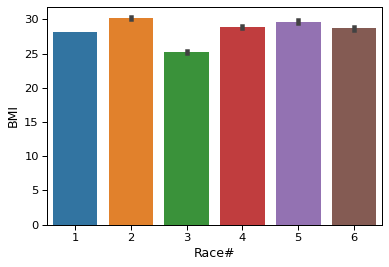

<AxesSubplot:xlabel='Race#', ylabel='GenHealth#'>

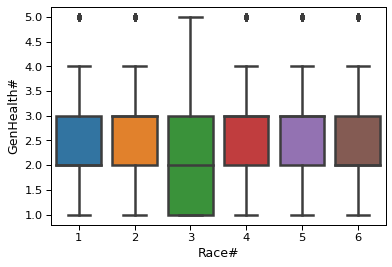

In [386]:
df_clean_dummies = pd.read_csv(path+'datasets'+'/df_clean_dummies.csv')
sns.barplot(x='Race#', y='BMI', data=df_clean_dummies)
plt.show()




sns.boxplot(x='Race#', y='GenHealth#', data=df_clean_dummies)
    